# Ficha Técnica

Disciplina - Otimização e processos dinâmicos.

Conteúdo - EDO 
- Equação diferencial ordinária.
- EDO Numérica.
- EDO Equações de diferenças.

Resolução:
- EDO numérica.
- Programação em Python.

Observações:
- Material debatido no grupo de pesquisa em Macroeconomia aplicada do Ibmec-SP 
- http://dgp.cnpq.br/dgp/espelhogrupo/2650993364668746

Autores: 
- Anderson Borba (anderson.aborba@professores.ibmec.edu.br) e
- Luiz Barboza (luiz.cbjunior@professores.ibmec.edu.br).

Endereço eletrônico: http://quant-ibmec.group/calculos/

# Introdução a Equações Diferenciais Ordinárias (EDO)  numéricas.
O objetivo é resolver Equações Diferencias Ordinárias (EDO) de primeira ordem numéricamente,
\begin{equation}
\frac{dy}{dt}= f(t, y). \tag{EDO}
\end{equation}

Seja a expansão em série de Taylor de uma funcão $y(x)$ com a regularidade necessária,
\begin{equation}
y(x+h) = y(x) + \left.\frac{dy}{dx}\right|_x h +  \frac{1}{2!}\left.\frac{dy^2}{dx^2}\right|_x h^2+\frac{1}{3!}\left.\frac{dy^3}{dx^3}\right|_x h^3+\frac{1}{4!}\left.\frac{dy^4}{dx^4}\right|_x h^4+\dots
\end{equation} 
\begin{equation}
+\dots+o(h^n)+\dots \tag{1}
\end{equation} 
## Método de Euler
Reescrevando a expansão em série de Taylor (1),
\begin{equation}
y(x+h) - y(x) =h\left( \left.\frac{dy}{dx}\right|_x  +  \frac{1}{2!}\left.\frac{d^2y}{dx^2}\right|_x h+\frac{1}{3!}\left.\frac{dy^3}{dx^3}\right|_x h^2+\frac{1}{4!}\left.\frac{dy^4}{dx^4}\right|_x h^3+\dots.\right.
\end{equation}
\begin{equation}
+\dots + o(h^{n-1})+\dots \tag{2}
\end{equation}
\begin{equation}
\frac{y(x+h) - y(x)}{h} =\left.\frac{dy}{dx}\right|_x  +  \frac{1}{2!}\left.\frac{d^2y}{dx^2}\right|_x h+\frac{1}{3!}\left.\frac{dy^3}{dx^3}\right|_x h^2+\frac{1}{4!}\left.\frac{dy^4}{dx^4}\right|_x h^3+\dots
\end{equation}
\begin{equation}
+\dots+o(h^{n-1})+\dots \tag{3}
\end{equation}
Podemos considerar a aproximação para a derivada,
\begin{equation}
\frac{dy}{dx}  = \frac{y(x+h) - y(x)}{h} +o(h), \tag{4}
\end{equation}
retomando a (EDO) e usando (4) teremos
\begin{equation}
\frac{y(x+h) - y(x)}{h} = f(t,y), \tag{5}
\end{equation}
realizando o algebrismo necessário encontramos o método de Euler
\begin{equation}
y(x+h) = y(x) + hf(t,y). \tag{6}
\end{equation}

Considerando o tempo discreto com passo $h$ teremos
\begin{equation}
y_{i+1} = y_i + hf(t_i,y_i). \tag{Método de Euler}
\end{equation}
note que desprezamos o termo $o(h)$ na aproximação da derivada, desta maneira podemos afirmar que realizamos uma aproximação de ordem 1.

## EDO programadas
Seja
\begin{equation}
\frac{dy}{dt}= f(t, y), \tag{EDO}
\end{equation}
com $f(t, y)=f_i(t, y)$, $i=1,2,3,$ e, $4$,
\begin{equation}
f_1(t, y)=t-y+2,
\end{equation}
\begin{equation}
f_2(t, y)=y-t^2+1,
\end{equation}
\begin{equation}
f_3(t, y)=te^{3t}-2y,
\end{equation}
\begin{equation}
f_4(t, y)=\frac{2y}{t}+t^2e^t.
\end{equation}
Encontre e verifique as soluções da EDO. Use as mesmas para definir as condições iniciais $y(0)$ da EDO.

In [ ]:
def fun1_2d(t, y):
    fun1 = t - y + 2.0
    return fun1
def fun2_2d(t, y):
    fun2 = y - t**2 + 1;
    return fun2
def fun3_2d(t, y):
    fun3 = t * exp(3*t) - 2 * y
    return fun3
def fun4_2d(t, y):
    fun4 = 2 * y / t + t**2 * exp(t)
    return fun4  


In [ ]:
def sol1_exata_pvi(t):
    sol1 = exp(-t) + t + 1.0
    return sol1
def sol2_exata_pvi(t):
    sol2 = (t + 1)**2 - 0.5 * exp(t)
    return sol2
def sol3_exata_pvi(t):
    sol3 = t * t * (exp(t) - exp(1))
    return sol3
def sol4_exata_pvi(t):
    sol4 = 0.2 * t * exp(3*t) - 0.04 * exp(3*t) + 0.04 * exp(-2*t)
    return sol4    

0.5
0.004046271429433368


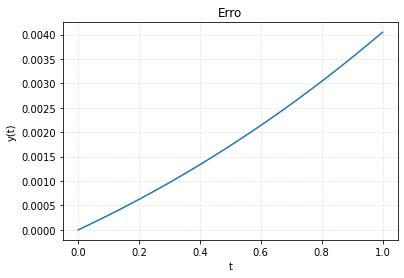

In [ ]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
a = 0
b = 1
n = 256
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = sol2_exata_pvi(t[0])
print(y[0])
for i in range(1, n + 1):
	y[i] = y[i - 1] + h * fun2_2d(t[i - 1], y[i - 1])
for i in range(0, n + 1):
	sol_ex[i] = sol2_exata_pvi(t[i])
erro = abs(y - sol_ex)
erro_max = max(erro)
print(erro_max)
# Plot
plt.plot(t,erro )
plt.title('Erro')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

## Erro do Método de Euler 
Na tabela mostramos o erro calculando a norma do máximo entre a solução exata e solução aproximada para cada partição do eixo t com dimensão $n$. Duplicamos o $n$ com objetivo de conhecer a razão entre dois erro consecutivos.

Dimensão | Euler | Razão
--- | --- | ---
n=16  |  0.06219386553919026  |   ****
n=32  |  0.03176009200263774  |   1.9582
n=64  |  0.016052576936856244 |   1.9785
n=128 |  0.00807030670580211  |   1,9890
n=256 |  0.004046271429433368 |   1,9945

Observando os dados podemos concluir que o método realmente é de ordem $1$, isto é, aumentando o $n$ em duas vezes, a razão entre erros consecutivos converge para dois. É importante notar que esse fato nos mostra uma maneira de validar nosso código. Para gerar esses dados foi usado a função $f_2(t,y)$.

## Exercício

Uma equação diferencial ordinária linear de primeira ordem pode ser escrita por $$\frac{dy}{dt}=f(t).$$
Seja $f(t)= e^{k t}$, onde $k=5$. 

a) Encontre a solução da equação diferencial ordinária.

b) Escreva a equação discreta no tempo, ou seja, a equação de diferenças.

c) Encontre a solução para cada $t$ com a condição inicial $y(0)=\frac{1}{5}$. Defina $h=0.25$ no intervalo $t\in[0,1]$, ou seja, defina os tempos, $t=0.25, 0.5, 0.75, 1$. Repita para $h=0.1$ em $t\in[0,1]$.

d) Em cada iteração do processo, encontre o erro em relação a solução exata. Tanto para $h=0.25$ quanto $h=0.1$.

## Referências
- Computer Methods for Ordinary Differential Equations And Differential Algebraic equation. Uri M. Acher, Linda R. Petzold- SIAM

- Análise Numérica - Richard Burden (Autor), J. Douglas Faires (Autor) - Thomson